In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import StandardScaler

In [5]:
milk = pd.read_csv("milk.csv", index_col=0)

scaler = StandardScaler()
milkscaled = scaler.fit_transform(milk)

Calculating the linkages

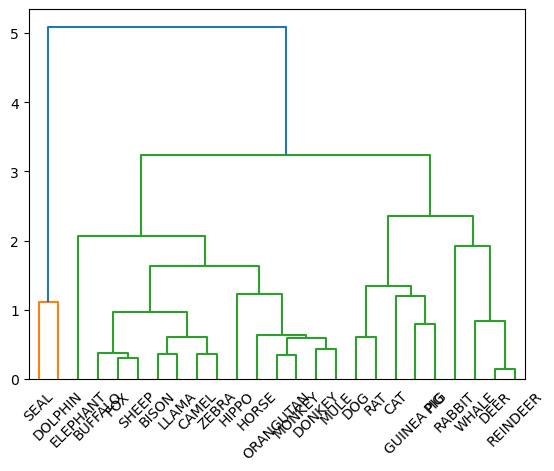

In [6]:
mergings = linkage(milkscaled, method='average')
dendrogram(mergings, labels=list(milk.index),leaf_rotation=45, leaf_font_size=10)
plt.show()

sklearn

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

clustering = AgglomerativeClustering(n_clusters=2, linkage='average')
clustering.fit(milkscaled)

print(clustering.labels_)
print(silhouette_score(milkscaled, clustering.labels_))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
0.5186847578981009


In [8]:
from sklearn.pipeline import Pipeline

clustering = AgglomerativeClustering(n_clusters=2, linkage='average')
pipe = Pipeline([('SCL', scaler), ('CLUST', clustering)])
pipe.fit(milk)
milkscaled = scaler.fit_transform(milk)
print(clustering.labels_)
print(silhouette_score(milkscaled, clustering.labels_))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
0.5186847578981009
